<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2021_UNH_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-30 08:38:24--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.1.206, 2607:f8b0:4004:801::200e
Connecting to drive.google.com (drive.google.com)|172.217.1.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1noef972hqhqhhgovpthrq773sv3de1n/1672389450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a9ff98bd-45a4-46b1-918a-d2abdb28a510 [following]
--2022-12-30 08:38:27--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1noef972hqhqhhgovpthrq773sv3de1n/1672389450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=a9ff98bd-45a4-46b1-918a-d2abdb28a510
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to doc-0k-9o-docs.goo

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/畢專/UNH_2021_Q3_20211014發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,UnitedHealth,0.0,0.0,proper noun,compound,True,False,False,False
1,Group,0.0,0.0,proper noun,compound,True,False,False,False
2,Incorporated,0.0,0.0,proper noun,root,True,False,False,False
3,(,0.0,0.0,punctuation,punctuation,False,False,True,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8777,again,0.0,0.0,adverb,adverbial modifier,True,True,False,False
8778,for,0.0,0.0,adposition,prepositional modifier,True,True,False,False
8779,their,0.0,0.0,pronoun,possession modifier,True,True,False,False
8780,participation,0.0,0.0,noun,object of preposition,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          8782 non-null   object 
 1   Polarity      8782 non-null   float64
 2   Subjectivity  8782 non-null   float64
 3   Pos_          8782 non-null   object 
 4   Dep_          8779 non-null   object 
 5   Alpha         8782 non-null   bool   
 6   Stopword      8782 non-null   bool   
 7   Punct         8782 non-null   bool   
 8   Num           8782 non-null   bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 377.5+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,UnitedHealth,0.0,0.0,proper noun,compound,True,False,False,False
1,Group,0.0,0.0,proper noun,compound,True,False,False,False
2,Incorporated,0.0,0.0,proper noun,root,True,False,False,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
6,UNH,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8769,conclude,0.0,0.0,verb,root,True,False,False,False
8770,today,0.0,0.0,noun,possession modifier,True,False,False,False
8772,conference,0.0,0.0,noun,direct object,True,False,False,False
8775,thank,0.0,0.0,verb,root,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
75,Credit,0.0,0.0,noun,compound,True,False,False,False
86,FargoOperatorPlease,0.0,0.0,noun,nominal subject,True,False,False,False
87,standby,0.0,0.0,adverb,clausal complement,True,False,False,False
93,begin,0.0,0.0,verb,open clausal complement,True,False,False,False
95,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8769,conclude,0.0,0.0,verb,root,True,False,False,False
8770,today,0.0,0.0,noun,possession modifier,True,False,False,False
8772,conference,0.0,0.0,noun,direct object,True,False,False,False
8775,thank,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
87,standby,0.0,0.0,adverb,clausal complement,True,False,False,False
95,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
96,morning,0.0,0.0,noun,root,True,False,False,False
121,follow,0.0,0.0,verb,root,True,False,False,False
125,prepared,0.0,0.0,verb,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8761,Thanks,0.2,0.2,noun,root,True,False,False,False
8765,today,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
8769,conclude,0.0,0.0,verb,root,True,False,False,False
8772,conference,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
87,standby,0.0,0.0,adverb,clausal complement,True,False,False,False
95,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
125,prepared,0.0,0.0,verb,adjectival modifier,True,False,False,False
141,important,0.4,1.0,adjective,adjectival modifier,True,False,False,False
142,introductory,0.0,0.0,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8715,fully,0.0,0.0,adverb,adverbial modifier,True,False,False,False
8724,healthier,0.0,0.0,adjective,adjectival modifier,True,False,False,False
8733,better,0.5,0.5,adverb,adverbial modifier,True,False,False,False
8739,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    721.000000
mean       0.096452
std        0.218436
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.160000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    721.000000
mean       0.264754
std        0.315684
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
87,standby,0.0,0.0,adverb,clausal complement,True,False,False,False,Neutral,Objective
95,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
125,prepared,0.0,0.0,verb,adjectival modifier,True,False,False,False,Neutral,Objective
141,important,0.4,1.0,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
142,introductory,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
8715,fully,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
8724,healthier,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
8733,better,0.5,0.5,adverb,adverbial modifier,True,False,False,False,Positive,Subjective
8739,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,53
1,Neutral,Objective,367
2,Neutral,Subjective,68
3,Positive,Subjective,233


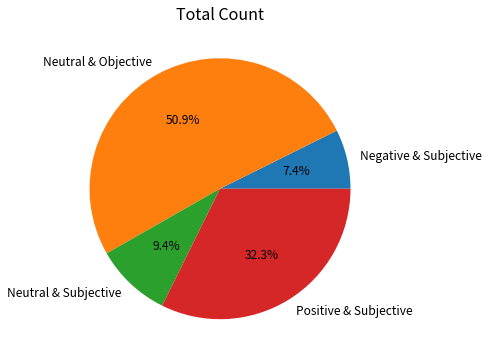

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

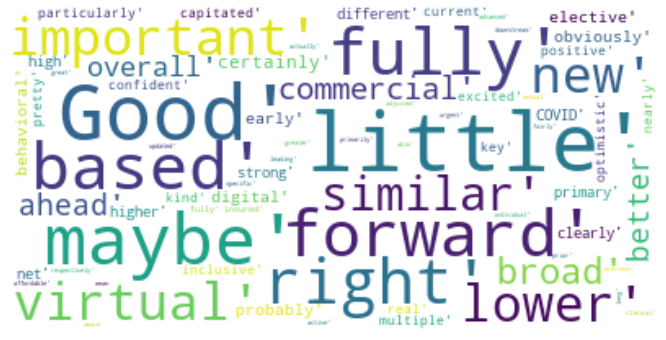

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,UnitedHealth Group Incorporated (NYSE:UNH) Q3 ...,0.000000,0.000000
1,BMO Capital MarketsJosh Raskin – Nephron Resea...,0.000000,0.000000
2,"Good morning, everyone, and welcome to the Uni...",0.500000,0.500000
3,A question-and-answer session will follow Unit...,0.000000,0.000000
4,"As a reminder, this call is being recorded.",0.000000,0.000000
...,...,...,...
452,And we're deeply aware of where and how we nee...,0.375000,0.375000
453,We look forward to sharing with you a more at ...,0.318182,0.477273
454,Thanks for your time today.,0.200000,0.200000
455,OperatorThat does conclude today's conference.,0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    457.000000
mean       0.129536
std        0.197303
min       -0.291667
25%        0.000000
50%        0.000000
75%        0.204167
max        0.800000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    457.000000
mean       0.276880
std        0.274731
min        0.000000
25%        0.000000
50%        0.200000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,UnitedHealth Group Incorporated (NYSE:UNH) Q3 ...,0.000000,0.000000,Neutral,Objective
1,BMO Capital MarketsJosh Raskin – Nephron Resea...,0.000000,0.000000,Neutral,Objective
2,"Good morning, everyone, and welcome to the Uni...",0.500000,0.500000,Positive,Subjective
3,A question-and-answer session will follow Unit...,0.000000,0.000000,Neutral,Objective
4,"As a reminder, this call is being recorded.",0.000000,0.000000,Neutral,Objective
...,...,...,...,...,...
452,And we're deeply aware of where and how we nee...,0.375000,0.375000,Positive,Subjective
453,We look forward to sharing with you a more at ...,0.318182,0.477273,Positive,Subjective
454,Thanks for your time today.,0.200000,0.200000,Positive,Subjective
455,OperatorThat does conclude today's conference.,0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,30
1,Neutral,Objective,171
2,Neutral,Subjective,29
3,Positive,Objective,1
4,Positive,Subjective,226


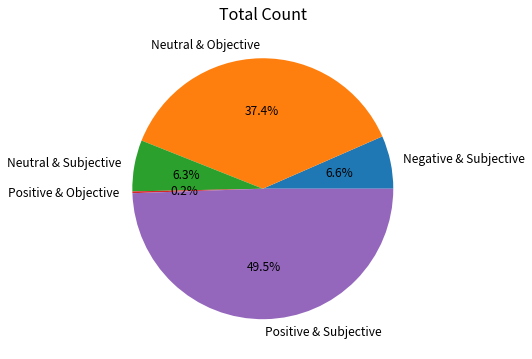

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)These statements are subject to risks and uncertainties that could cause actual results to differ materially from historical experience or present expectations.

2)Unfortunately, our CEO and colleague, Andrew, is not with us this morning since he had an urgent but straightforward procedure last night for a kidney stone.

3)John Rex and I will be subbing for Andrew this morning and we have our management team with us, as usual, to help with your questions.

4)We continue to see active interest in our product innovations, such as our All Savers level-funded offering and are encouraged by our competitiveness in the market and momentum heading into '22.We also elevated consumer connectivity by incorporating fitness offerings from industry-leading partners.

5)In addition to carrying for people in their homes, we continued to expand capabilities in other optimal sites of care, including via digital means.

6)Let me now go a little deeper in a few areas to give you an assessment of how we 

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)UnitedHealth Group Incorporated (NYSE:UNH) Q3 2021 Earnings Conference Call October 14, 2021 8:45 AM ETCompany ParticipantsDirk McMahon – Chief Operating Officer for UnitedHealth GroupJohn Rex – Chief Financial OfficerConference Call ParticipantsMatt Borsch –

2)BMO Capital MarketsJosh Raskin – Nephron ResearchRalph Giacobbe – CitiDave Windley – JefferiesKevin Fischbeck – Bank of AmericaJustin Lake – Wolfe ResearchLance Wilkes – BernsteinScott Fidel – StephensRicky Goldwasser – Morgan StanleyKevin Caliendo – UBSAJ Rice – Credit SuisseLisa Gill – JPMorganSteven Valiquette – BarclaysStephen Baxter – Wells FargoOperatorPlease standby, we're about to begin.

3)A question-and-answer session will follow UnitedHealth Group's prepared remarks.

4)As a reminder, this call is being recorded.

5)This call contains forward-looking statements under U.S. federal securities laws.

6)This call will also reference non-GAAP amounts.

7)Information presented on this call is contained in the earnings re

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)A description of some of the risks and uncertainties can be found in the reports that we filed with the Securities and Exchange Commission, including the cautionary statements included in our current and periodic filings.

2)All went very well and we expect him fully back in just a few days.

3)I'll briefly highlight a couple of items for you.

4)We expect, during 2022 and beyond, to further build on these opportunities to connect and integrate multiple channels of care.

5)This morning, we reported third quarter and year-to-date revenues of 72 and 214 billion respectively.

6)Growth of 11 and 12% over last year.

7)Looking at specific business performance.

8)OptumHealth's third-quarter revenue and earnings increased 32% and 37%, respectively, year-over-year.

9)As noted earlier, given the strength of our business performance, this morning, we updated our 2021 adjusted earnings outlook to a range of $18.65 to $18.90 per share.

10)With the range being similar to that offered initial

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Good morning, everyone, and welcome to the UnitedHealth Group Third Quarter 2021 Earnings Conference Call.

2)Here are some important introductory information.

3)A reconciliation of the non-GAAP to GAAP amounts is available on the financial and earnings reports section of the company's Investor Relations page at unitedhealthgroup.com.

4)I'm quite confident he's listening now.

5)First, unlocking the collaborative potential within Optum and UnitedHealthcare for the benefit of all.

6)Second, further developing our technology in data science platform to aid patient care and experience and to help the system run better.

7)You likely have seen the CMS Medicare advantage/quality ratings showing 95% of our UnitedHealthcare members will be in four-star rated plans or better for 2023, up from 78% for 2022 and a new high for our Company.

8)with Optum Care on behalf of the many payers, we serve 99% of Medicare Advantage patients will be enforced our plans or better for 2023.

9)A second im

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

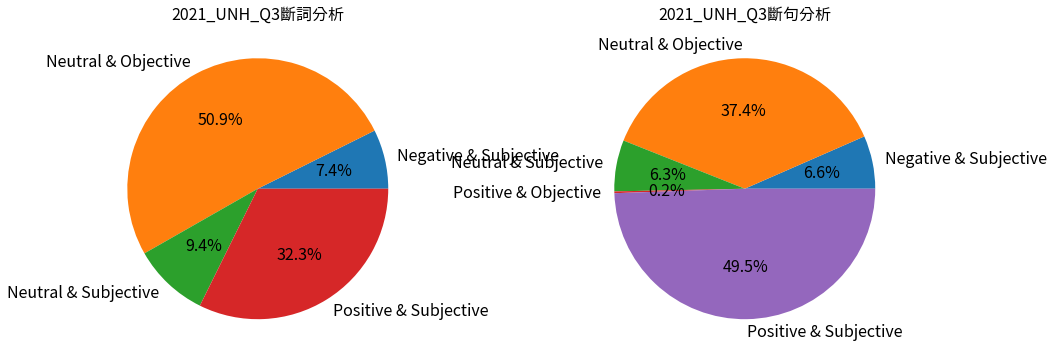

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
label2 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective","Positive & Subjective"]
axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2021_UNH_Q3斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2021_UNH_Q3斷句分析', fontsize=16)


plt.savefig("2021_UNH_Q3.png")
from google.colab import files
files.download("2021_UNH_Q3.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html


5家公司，4季，2年 =5* 4 * 2=40